#Start


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/train.csv"
df = pd.read_csv(file_path)


df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

(None,
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
 0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
 1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
 2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
 3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
 4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City       State  \
 0      Claire Gute   Consumer  United States        Henderson    Kentucky   
 1      Claire Gute   Consumer  United States        Henderson    Kentucky   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
 
    Postal Code Region       

In [ ]:

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Fill missing postal codes
df['Postal Code'].fillna(method='ffill', inplace=True)

# Convert 'Postal Code' to integer type
df['Postal Code'] = df['Postal Code'].astype(int)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

<ipython-input-10-71143f8fb6e2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(method='ffill', inplace=True)
<ipython-input-10-71143f8fb6e2>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Postal Code'].fillna(method='ffill', inplace=True)


(None,
    Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
 0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
 1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
 2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
 3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
 4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
 
      Customer Name    Segment        Country             City       State  \
 0      Claire Gute   Consumer  United States        Henderson    Kentucky   
 1      Claire Gute   Consumer  United States        Henderson    Kentucky   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
 
    Postal Code Region       Product ID  

In [ ]:

import numpy as np

df_cleaned = df.copy()


df_cleaned.dropna(inplace=True)

# Removing duplicates
df_cleaned.drop_duplicates(inplace=True)

# Standardizing categorical columns
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.str.strip().str.lower())

df_cleaned['Order Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order Day'] = df_cleaned['Order Date'].dt.day


df_cleaned['Log Sales'] = np.log1p(df_cleaned['Sales'])

display(df_cleaned)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Day,Log Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,Claire Gute,consumer,united states,henderson,...,south,FUR-BO-10001798,furniture,bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,5.572002
1,2,CA-2017-152156,2017-11-08,2017-11-11,second class,CG-12520,Claire Gute,consumer,united states,henderson,...,south,FUR-CH-10000454,furniture,chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,6.597064
2,3,CA-2017-138688,2017-06-12,2017-06-16,second class,DV-13045,Darrin Van Huff,corporate,united states,los angeles,...,west,OFF-LA-10000240,office supplies,labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,2.748552
3,4,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,Sean O'Donnell,consumer,united states,fort lauderdale,...,south,FUR-TA-10000577,furniture,tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,6.865450
4,5,US-2016-108966,2016-10-11,2016-10-18,standard class,SO-20335,Sean O'Donnell,consumer,united states,fort lauderdale,...,south,OFF-ST-10000760,office supplies,storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,3.151368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,standard class,SH-19975,Sally Hughsby,corporate,united states,chicago,...,central,OFF-BI-10003429,office supplies,binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,21,1.568199
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,corporate,united states,toledo,...,east,OFF-AR-10001374,office supplies,art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,12,2.430802
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,corporate,united states,toledo,...,east,TEC-PH-10004977,technology,phones,GE 30524EE4,235.1880,2016,1,12,5.464628
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,standard class,CS-12490,Cindy Schnelling,corporate,united states,toledo,...,east,TEC-PH-10000912,technology,phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,12,3.309667


#ARIMA

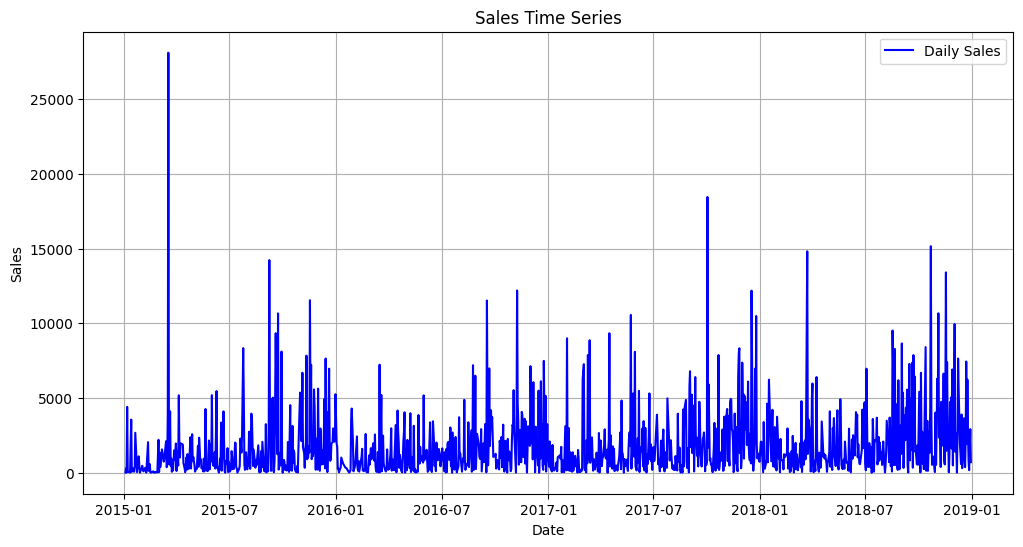

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

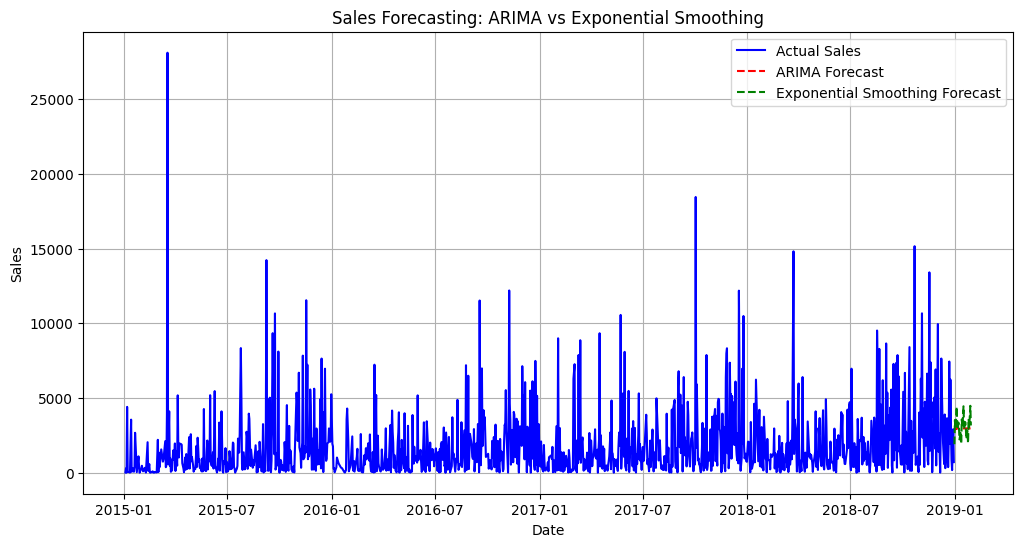

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aggregating sales data by Order Date for time series forecasting
df_time_series = df_cleaned.groupby('Order Date')['Sales'].sum().reset_index()


df_time_series.set_index('Order Date', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series')
plt.legend()
plt.grid(True)
plt.show()

# Time Series Forecasting with ARIMA
order = (2, 1, 2)
arima_model = sm.tsa.ARIMA(df_time_series, order=order)
arima_result = arima_model.fit()


forecast_steps = 30
arima_forecast = arima_result.forecast(steps=forecast_steps)


hw_model = ExponentialSmoothing(df_time_series, trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()


hw_forecast = hw_result.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df_time_series, label="Actual Sales", color='blue')
plt.plot(pd.date_range(df_time_series.index[-1], periods=forecast_steps+1, freq='D')[1:], arima_forecast, label="ARIMA Forecast", linestyle='dashed', color='red')
plt.plot(pd.date_range(df_time_series.index[-1], periods=forecast_steps+1, freq='D')[1:], hw_forecast, label="Exponential Smoothing Forecast", linestyle='dashed', color='green')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecasting: ARIMA vs Exponential Smoothing")
plt.legend()
plt.grid(True)
plt.show()

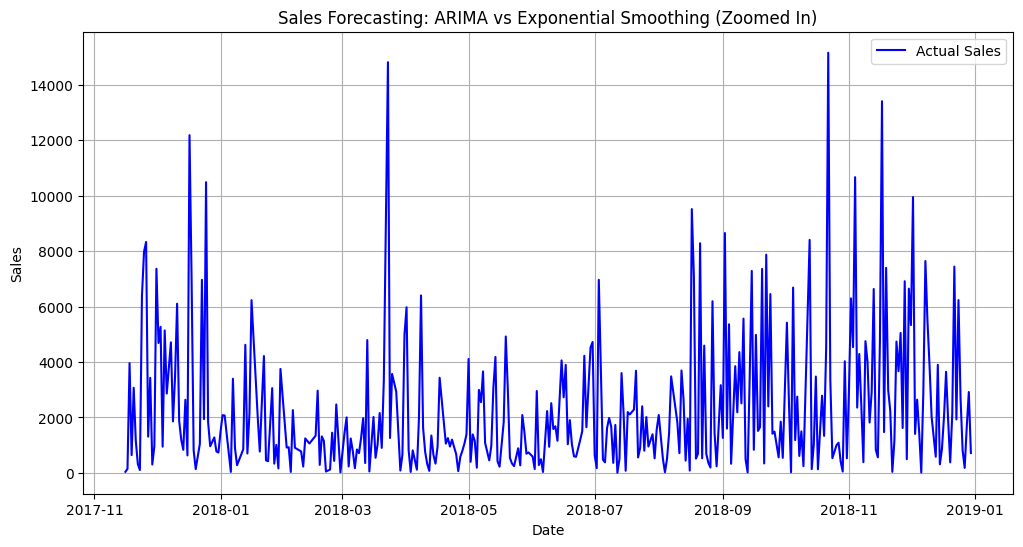

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_time_series[-365:], label="Actual Sales", color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecasting: ARIMA vs Exponential Smoothing (Zoomed In)")
plt.legend()
plt.grid(True)
plt.show()

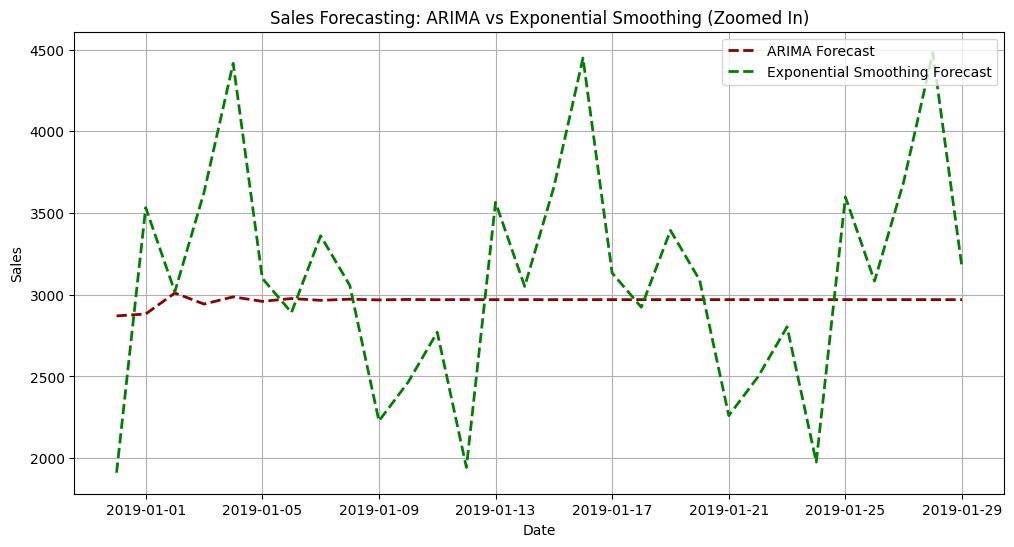

In [ ]:
plt.figure(figsize=(12, 6))

#ARIMA plot
plt.plot(pd.date_range(df_time_series.index[-1], periods=forecast_steps+1, freq='D')[1:],
         arima_forecast, label="ARIMA Forecast", linestyle='dashed', color='#8B0000', linewidth=2)

plt.plot(pd.date_range(df_time_series.index[-1], periods=forecast_steps+1, freq='D')[1:],
         hw_forecast, label="Exponential Smoothing Forecast", linestyle='dashed', color='green', linewidth=2)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecasting: ARIMA vs Exponential Smoothing (Zoomed In)")
plt.legend()
plt.grid(True)
plt.show()


ARIMA and Exponential Smoothing (Holt-Winters) models were applied to forecast sales for the next 30 days.


The forecasted sales trends were plotted alongside the actual sales data.

Observations:
ARIMA (Red Line) captures the trend and fluctuations in sales.
Exponential Smoothing (Green Line) provides a smooth forecast with seasonal adjustments.

In [ ]:
# Saveing the cleaned dataset for Power BI
dashboard_csv_path = "sales_dashboard_data.csv"
df.to_csv(dashboard_csv_path, index=False)

dashboard_csv_path


'sales_dashboard_data.csv'